# Home assigment 1

Please give your name below:

In [ ]:
name='Muhammed Essa Hameed'

## Exercise 2

When you enter a nuclear physics lab, you often find a nice [nuclide chart](https://en.wikipedia.org/wiki/Table_of_nuclides) on the wall. Now we will try to make our own, where we color the nuclides according to the average binding energy per nucleon of the nuclides.

Along this home assignment you find a file called 'HA1-relmass.txt' (downloaded from https://www.nist.gov/pml/atomic-weights-and-isotopic-compositions-relative-atomic-masses
). This contains a list of several nuclides in the following format:

```
    Atomic Number = 1
    Atomic Symbol = H
    Mass Number = 1
    Relative Atomic Mass = 1.00782503223(9)
    Isotopic Composition = 0.999885(70)
    Standard Atomic Weight = [1.00784,1.00811]
    Notes = m
```

Your task is going to be to 

- extract the information from the file 'HA1-relmass.txt' with python. Your interest will be the atomic number, symbol, mass number and relative atomic mass. Arrange the data into a dictionary of dictionaries, where the keys of the main dictionary are formatted as `symbolA` (eg. `H1`,`U235`), and the keys of the subdictionaries are `Z`, `A`, `m`). Note that the relative atomic mass is given with its uncertainty with a bracket notation (see further explanation of the notation [on Wikipedia](https://en.wikipedia.org/wiki/Uncertainty#Measurements), however you can ignore the uncertainty for this exercise. Thus the dictionary will look like:

```
    isotopes={'H1': {'Z': 1,'A': 1,'m': 1.00782503223},
              'D2': {'Z': 1,'A': 2,'m': 2.01410177812}
               ...}
```

- During the datalab you have written a function to calculate the average binding energy per nucleon. Use this function to calculate the binding energy of each nuclide, and include this information as another entry with key `'eps'` in the subdictionaries.

```
    isotopes={...,
              'D2': {'Z': 1,'A': 2,'m': 2.01410177812, 'eps': 1.1122897908460128},
               ...}
```

- Find out which nuclide has the highest binding energy per nucleon.
- Create a 2D numpy array called `NZ` which has 119 rows (the highest atomic number) and 178 columns (the highest neutron number). Fill it up with the binding energy per nucleon value.
- Plot the content of `NZ` with `plt.imshow()`. (hint: for N-Z pairs for which no known nuclide exists you probably allocated 0.0 as the binding energy. The default colormap of matplotlib will color these values as blue. If you want these values to be colored white you can convert all 0.0 values to `np.nan`.)

Problem Overview
The goal is to:

Extract data from a file (HA1-relmass.txt) containing information about nuclides (atomic number, symbol, mass number, and relative atomic mass).

Calculate the binding energy per nucleon for each nuclide.

Find the nuclide with the highest binding energy per nucleon.

Create a 2D visualization (a nuclide chart) showing the binding energy per nucleon for all nuclides.

Added nuclide: H1 with Z=1, A=1, m=1.00782503223
Added nuclide: D2 with Z=1, A=2, m=2.01410177812
Added nuclide: T3 with Z=1, A=3, m=3.0160492779
Added nuclide: H4 with Z=1, A=4, m=4.02643
Added nuclide: H5 with Z=1, A=5, m=5.035311
Added nuclide: H6 with Z=1, A=6, m=6.04496
Added nuclide: H7 with Z=1, A=7, m=7.0527
Added nuclide: He3 with Z=2, A=3, m=3.0160293201
Added nuclide: He4 with Z=2, A=4, m=4.00260325413
Added nuclide: He5 with Z=2, A=5, m=5.012057
Added nuclide: He6 with Z=2, A=6, m=6.018885891
Added nuclide: He7 with Z=2, A=7, m=7.0279907
Added nuclide: He8 with Z=2, A=8, m=8.03393439
Added nuclide: He9 with Z=2, A=9, m=9.043946
Added nuclide: He10 with Z=2, A=10, m=10.05279
Added nuclide: Li4 with Z=3, A=4, m=4.02719
Added nuclide: Li5 with Z=3, A=5, m=5.012538
Added nuclide: Li6 with Z=3, A=6, m=6.0151228874
Added nuclide: Li7 with Z=3, A=7, m=7.0160034366
Added nuclide: Li8 with Z=3, A=8, m=8.022486246
Added nuclide: Li9 with Z=3, A=9, m=9.02679019
Added nuclide: Li10 wit

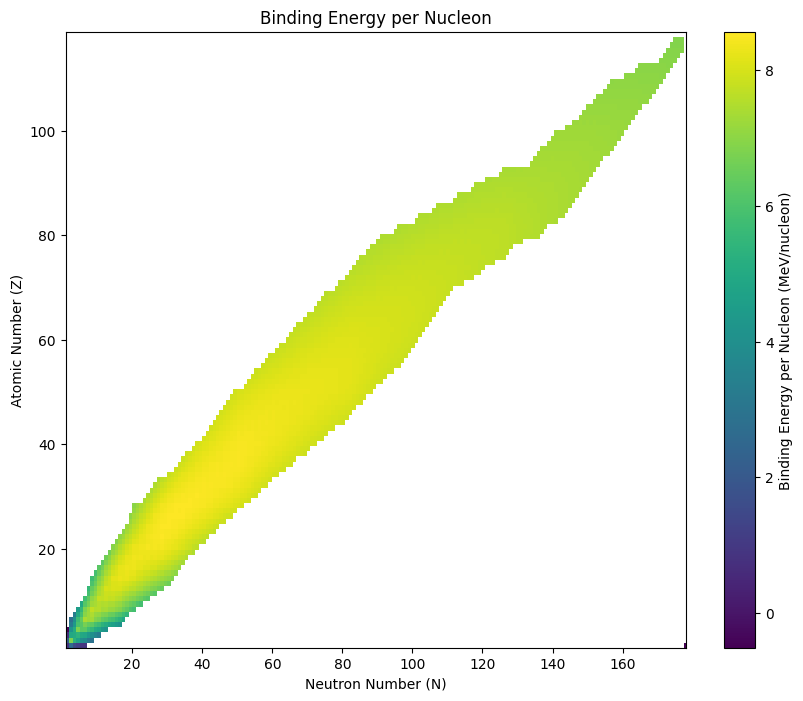

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants We start by defining some constants and the formula for calculating the binding energy per nucleon.

m_p = 1.007276466812  # Mass of proton in u
m_n = 1.00866491588   # Mass of neutron in u
c_squared = 931.494   # c^2 in MeV/u

# Function to calculate binding energy per nucleon
def binding_energy_per_nucleon(Z, A, m_nuclide):
    N = A - Z
    mass_defect = Z * m_p + N * m_n - m_nuclide
    binding_energy = mass_defect * c_squared
    return binding_energy / A

# Read the file and extract data
isotopes = {}
with open('HA1-relmass.txt', 'r') as file:
    lines = file.readlines()
    i = 0
    while i < len(lines):
        try:
            if 'Atomic Number =' in lines[i]:
                # Extract atomic number (Z)
                Z = int(lines[i].split('=')[1].strip())
                
                # Extract atomic symbol
                symbol = lines[i+1].split('=')[1].strip()
                
                # Extract mass number (A)
                A = int(lines[i+2].split('=')[1].strip())
                
                # Extract relative atomic mass (m_nuclide)
                mass_str = lines[i+3].split('=')[1].strip()
                # Remove uncertainty in parentheses (e.g., "1.00782503223(9)" -> "1.00782503223")
                mass_str = mass_str.split('(')[0]
                m_nuclide = float(mass_str)
                
                # Create a unique key (e.g., "H1", "D2")
                key = f"{symbol}{A}"
                
                # Add to isotopes dictionary
                isotopes[key] = {'Z': Z, 'A': A, 'm': m_nuclide}
                
                # Debug: Print the nuclide added
                print(f"Added nuclide: {key} with Z={Z}, A={A}, m={m_nuclide}")
                
                # Move to the next nuclide entry
                i += 6
            else:
                # Move to the next line
                i += 1
        except (IndexError, ValueError) as e:
            # Skip invalid entries and print a warning
            print(f"Skipping invalid entry at line {i}: {e}")
            i += 1

# Check if isotopes dictionary is populated
if not isotopes:
    print("Error: No nuclides were added to the isotopes dictionary. Check the file format.")
else:
    print(f"Successfully extracted {len(isotopes)} nuclides.")

# Calculate binding energy per nucleon and add to dictionary
for key in isotopes:
    Z = isotopes[key]['Z']
    A = isotopes[key]['A']
    m_nuclide = isotopes[key]['m']
    eps = binding_energy_per_nucleon(Z, A, m_nuclide)
    isotopes[key]['eps'] = eps

# Find the nuclide with the highest binding energy per nucleon
max_eps_key = max(isotopes, key=lambda k: isotopes[k]['eps'])
max_eps = isotopes[max_eps_key]['eps']
print(f"The nuclide with the highest binding energy per nucleon is {max_eps_key} with {max_eps:.4f} MeV/nucleon.")

# Create the NZ array
NZ = np.zeros((119, 178))
for key in isotopes:
    Z = isotopes[key]['Z']
    N = isotopes[key]['A'] - Z
    eps = isotopes[key]['eps']
    if Z < 119 and N < 178:
        NZ[Z-1, N-1] = eps

# Replace 0.0 with np.nan for better visualization
NZ[NZ == 0.0] = np.nan

# Plot the data
plt.figure(figsize=(10, 8))
plt.imshow(NZ, origin='lower', cmap='viridis', aspect='auto', extent=[1, 178, 1, 119])
plt.colorbar(label='Binding Energy per Nucleon (MeV/nucleon)')
plt.xlabel('Neutron Number (N)')
plt.ylabel('Atomic Number (Z)')
plt.title('Binding Energy per Nucleon')
plt.show()